Here i'm going to do a test with a real game between noobs where white wins, see how average degree changes with each move as the game progresses. 

In [1]:
from ChessGame import CoordinateTranslator
from ChessGame import Chessboard
from ChessGame import ChessMove
from ChessGame import ChessPieceColor
from ChessGraph import Chessgraph
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## First game (white wins)

In [2]:
#The moves of the game 

fromPositions = [["E", 2], ["B", 7], ["D",2], ["C", 8], ["B", 1], ["A", 7], ["G", 1], ["D", 7], ["D", 4], ["D",8], ["F", 1], ["G", 7], ["E", 1], ["H", 1], ["F", 8],["C", 1], ["E", 8], ["A", 2], ["H",7], ["G", 5], ["G", 6], ["H", 4], ["H", 6], ["F", 3], ["G", 7], ["D", 1], ["G", 8], ["H", 5]]
toPositions = [["E", 4], ["B", 6], ["D", 4],["B",7], ["C",3], ["A", 6], ["F", 3], ["D", 6], ["D", 5], ["D", 7], ["D", 3], ["G", 6], ["G", 1], ["F", 1], ["G",7], ["G", 5], ["F",8], ["A", 4], ["H",6], ["H", 4], ["G", 5], ["G", 3], ["H", 5], ["G", 5], ["H", 6], ["H", 5], ["F", 6], ["F", 7]]
takeValue = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True]
forcedMoveValue = [False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True]

Board initialization


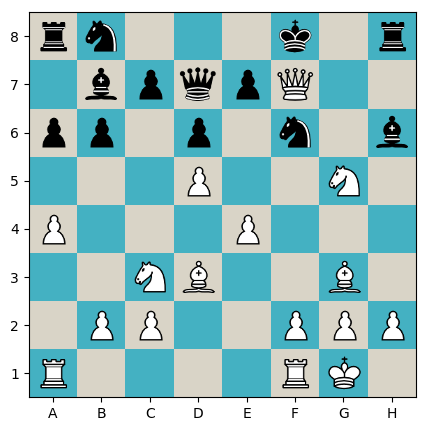

In [3]:
board = Chessboard()
whiteAverageDegrees = []
blackAverageDegrees = []

for i in range(0,len(fromPositions)):
    board.makeMove(ChessMove(fromPositions[i], toPositions[i], takeValue[i]), forcedMoveValue[i])
    whiteGraph = Chessgraph()
    blackGraph = Chessgraph()
    whiteGraph.initializeFromChessboardColored(board, ChessPieceColor.WHITE)
    whiteAverageDegrees.append(whiteGraph.getMeanDegree())
    blackGraph.initializeFromChessboardColored(board, ChessPieceColor.BLACK)
    blackAverageDegrees.append(blackGraph.getMeanDegree())

#Show final configuration of the board
board.displayBoard()

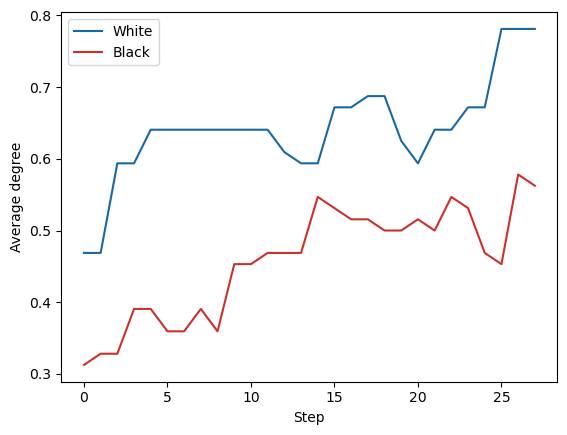

In [4]:
#Let's see the mean degree for white and black at each step

plt.figure()
plt.plot(whiteAverageDegrees, color = "#1868a1", label = "White")
plt.plot(blackAverageDegrees, color = "#cc302b", label = "Black")
plt.xlabel("Step")
plt.ylabel("Average degree")
plt.legend()

In this case the winner was always higher in connectivity than the losing player. 

## Second one (White wins)

Fun fact, in this one the winner achieved an accuracy over 98%. What's the probability that you would be wrong in saying this is a cheater?, my guess is that it's fairly improbable. This would of course depend on the distribution of accuracy percentages for people rated 600, which is the ELO i'm currently in (sad i know, but i'll get better, i always do).

In [52]:
fromPositions = [["E",2], ["E", 7], ["D", 1],["B", 8], ["F", 1], ["G", 7], ["H", 5], ["G", 8], ["D", 2], ["F", 8], ["G", 1], ["D", 7], ["E", 4], ["F", 6], ["E", 1], ["H", 1], ["C", 8], ["H" , 2], ["G", 4], ["F", 1], ["C", 5], ["C", 2], ["B", 4], ["D", 1], ["A", 5], ["C", 4], ["C", 6], ["D", 5], ["E",8], ["C", 1], ["F", 8], ["E", 1], ["E", 7], ["B", 3]]
toPositions = [["E", 4], ["E", 5], ["H", 5], ["C", 6], ["C", 4], ["G", 6], ["D", 1], ["F", 6], ["D",3], ["C", 5], ["F", 3], ["D", 5], ["D", 5], ["D", 5], ["G", 1], ["F", 1], ["G", 4], ["H", 3], ["F", 5], ["E", 1], ["B", 4], ["C", 3], ["A", 5], ["B", 3], ["B", 6], ["D", 5], ["A", 5], ["F", 7], ["F", 8], ["H", 6], ["E", 7], ["E", 5], ["D", 6], ["D",5]]
takeValue = [False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False]
forcedMoveValue = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


Board initialization


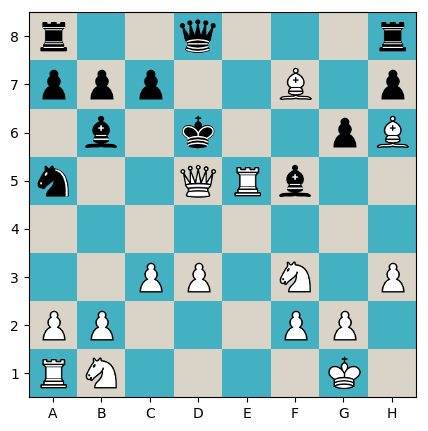

In [53]:
board = Chessboard()
whiteAverageDegrees = []
blackAverageDegrees = []

for i in range(0,len(fromPositions)):
    board.makeMove(ChessMove(fromPositions[i], toPositions[i], takeValue[i]), forcedMoveValue[i])
    whiteGraph = Chessgraph()
    blackGraph = Chessgraph()
    whiteGraph.initializeFromChessboardColored(board, ChessPieceColor.WHITE)
    whiteAverageDegrees.append(whiteGraph.getMeanDegree())
    blackGraph.initializeFromChessboardColored(board, ChessPieceColor.BLACK)
    blackAverageDegrees.append(blackGraph.getMeanDegree())

#Show final configuration of the board
board.displayBoard()

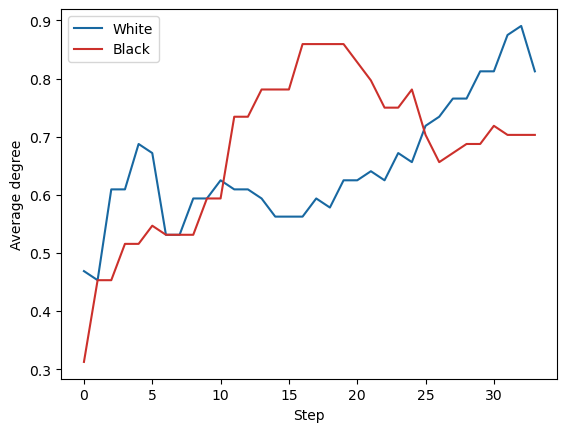

In [54]:
plt.figure()
plt.plot(whiteAverageDegrees, color = "#1868a1", label = "White")
plt.plot(blackAverageDegrees, color = "#cc302b", label = "Black")
plt.xlabel("Step")
plt.ylabel("Average degree")
plt.legend()

Interesting, cornering a king starts reducing the connectivity. So it would seem that the best strategy is to gather a lot of connectivity (which would be sort of potential energy) and then you use that to corner the king and the connectivity reduces.  